In [54]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [55]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [56]:
pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [57]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [58]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [59]:
#Импорт библиотек
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [60]:
#Функция preprocess() необходимаю для загрузки и предобработки данных
def preprocess():
    #Реализуется загрузка и чтение данных
    (X_train, y_train), (X_test, y_test) = cifar10.load_data() 
    #Происходило преобразование типов в «float32» 
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    #Обучающая и тестовая выборки были нормализованы "минимаксным» путем"
    X_train = (X_train - np.min(X_train)) / (np.max(X_train) - np.min(X_train)) 
    X_test = (X_test - np.min(X_train)) / (np.max(X_train) - np.min(X_train)) 
    #Выходные признаки переводятся в бинарные векторы
    y_train = np_utils.to_categorical(y_train, 10) 
    y_test = np_utils.to_categorical(y_test, 10)
    #Возвращает преобразованные входные и выходные признаки обучающей и тестовой выборок в виде кортежа
    return X_train, y_train, X_test, y_test

In [61]:
#Функция для вывода данных в виде графиков
def plot_results(history1, history2, history3, metric1, metric2):
    fig, axs = plt.subplots(1,3)
    fig.suptitle("Отображение метрик {metric1} и {metric2}".format(metric1=metric1, metric2=metric2))
    axs[0].plot(history1.history[metric1])
    axs[0].plot(history1.history[metric2])
    axs[1].plot(history2.history[metric1])
    axs[1].plot(history2.history[metric2])
    axs[2].plot(history3.history[metric1])
    axs[2].plot(history3.history[metric2])
    plt.show()

In [62]:
#Функция для вывода данных в виде текста
def print_results(kernel_size, dropout, accuracy, loss):
    print("")
    print("Размер ядра свертки - " + str(kernel_size) + " Наличие слоя Dropout - " + str(dropout))
    print('Точность на тестовых данных:', accuracy)
    print('Потери на тестовых данных:', loss)

In [63]:
#Функция create_model() служит для построения и настройки параметров компиляции
def create_model(kernel_size, dropout, folder):
  #ИНС состояла из двух повторяющихся блоков слоев (2 раза подряд свертка и субдискретизация (2х2)), 
  #если значение входного параметра dropout равнялась True, то в архитектуру добавлялись слои разреживания после слоев субдискретизации и полносвязного слоя, 
  #идущего после Flatten, так как необходимо было подавать данные на выходной слой в виде одномерного вектор-столбца.
    model = Sequential()
    model.add(Convolution2D(32, kernel_size=kernel_size, activation='relu', input_shape=(32, 32, 3)))
    model.add(Convolution2D(32, kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    if dropout == True:
      model.add(Dropout(0.25))
    model.add(Convolution2D(64, kernel_size=kernel_size, activation='relu'))
    model.add(Convolution2D(64, kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    if dropout == True:
      model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    if dropout == True:
      model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
    history = model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test))
    model.save(folder)
    #строит модель, обучает её и оценивает при помощи метода evaluate()
    test_loss, test_acc = model.evaluate(X_test, y_test)
    #возвращает историю обучения и значения точности и потерь на тестовой выборке
    return history, test_loss, test_acc

Epoch 1/5
1563/1563 [==============================] - 42s 26ms/step - loss: 1.5270 - accuracy: 0.4431 - val_loss: 139.9238 - val_accuracy: 0.3719
Epoch 2/5
1563/1563 [==============================] - 47s 30ms/step - loss: 1.1533 - accuracy: 0.5929 - val_loss: 324.4630 - val_accuracy: 0.2845
Epoch 3/5
1563/1563 [==============================] - 47s 30ms/step - loss: 1.0070 - accuracy: 0.6427 - val_loss: 300.0059 - val_accuracy: 0.3305
Epoch 4/5
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9162 - accuracy: 0.6768 - val_loss: 259.6971 - val_accuracy: 0.3873
Epoch 5/5
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8507 - accuracy: 0.7003 - val_loss: 197.4642 - val_accuracy: 0.4433


INFO:tensorflow:Assets written to: model51\assets


INFO:tensorflow:Assets written to: model51\assets


313/313 [==============================] - 2s 6ms/step - loss: 197.4642 - accuracy: 0.4433
Epoch 1/5
1563/1563 [==============================] - 34s 22ms/step - loss: 1.3455 - accuracy: 0.5146 - val_loss: 207.9360 - val_accuracy: 0.4055
Epoch 2/5
1563/1563 [==============================] - 43s 27ms/step - loss: 0.9214 - accuracy: 0.6764 - val_loss: 208.9762 - val_accuracy: 0.3929
Epoch 3/5
1563/1563 [==============================] - 43s 27ms/step - loss: 0.7198 - accuracy: 0.7471 - val_loss: 202.4822 - val_accuracy: 0.4676
Epoch 4/5
1563/1563 [==============================] - 43s 27ms/step - loss: 0.5547 - accuracy: 0.8048 - val_loss: 187.2959 - val_accuracy: 0.5057
Epoch 5/5
1563/1563 [==============================] - 39s 25ms/step - loss: 0.3995 - accuracy: 0.8594 - val_loss: 368.3586 - val_accuracy: 0.4349


INFO:tensorflow:Assets written to: model52\assets


INFO:tensorflow:Assets written to: model52\assets


313/313 [==============================] - 2s 6ms/step - loss: 368.3586 - accuracy: 0.4349
Epoch 1/5
1563/1563 [==============================] - 51s 33ms/step - loss: 1.5152 - accuracy: 0.4457 - val_loss: 153.6909 - val_accuracy: 0.3527
Epoch 2/5
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1124 - accuracy: 0.6059 - val_loss: 161.8050 - val_accuracy: 0.4410
Epoch 3/5
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9536 - accuracy: 0.6652 - val_loss: 162.1457 - val_accuracy: 0.4418
Epoch 4/5
1563/1563 [==============================] - 57s 36ms/step - loss: 0.8665 - accuracy: 0.6956 - val_loss: 158.0221 - val_accuracy: 0.4824
Epoch 5/5
1563/1563 [==============================] - 57s 36ms/step - loss: 0.8109 - accuracy: 0.7163 - val_loss: 186.0369 - val_accuracy: 0.4318


INFO:tensorflow:Assets written to: model53\assets


INFO:tensorflow:Assets written to: model53\assets


313/313 [==============================] - 3s 8ms/step - loss: 186.0369 - accuracy: 0.4318

Размер ядра свертки - (2, 2) Наличие слоя Dropout - True
Точность на тестовых данных: 0.4433000087738037
Потери на тестовых данных: 197.4641571044922

Размер ядра свертки - (2, 2) Наличие слоя Dropout - False
Точность на тестовых данных: 0.4348999857902527
Потери на тестовых данных: 368.35858154296875

Размер ядра свертки - (3, 3) Наличие слоя Dropout - True
Точность на тестовых данных: 0.4318000078201294
Потери на тестовых данных: 186.03689575195312


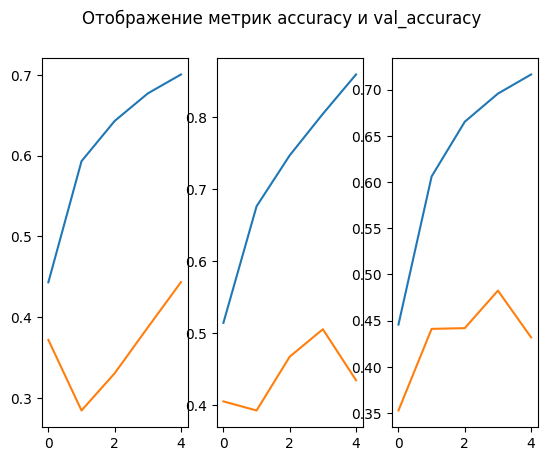

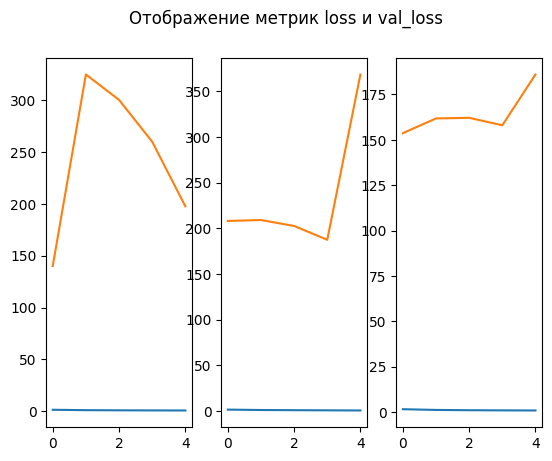

In [64]:
X_train, y_train, X_test, y_test = preprocess()

history1, loss1, accuracy1 = create_model((2,2), True, 'model1')
history2, loss2, accuracy2 = create_model((2,2), False, 'model2')
history3, loss3, accuracy3 = create_model((3,3), True, 'model3')

print_results((2,2), True, accuracy1, loss1)
print_results((2,2), False, accuracy2, loss2)
print_results((3,3), True, accuracy3, loss3)

plot_results(history1, history2, history3, 'accuracy', 'val_accuracy')
plot_results(history1, history2, history3, 'loss', 'val_loss')